In [1]:
# IMPORTING LIBRARIES

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# IMPORTING DATASET

df = pd.read_csv('Walmart.csv')

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
# Change Date columns to datetime type

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.index = df['Date']
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,,
2010-02-05,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


# Time series Forecasting (ARIMA)

In [6]:
df1 = df.copy()
df1['Month'] = df.Date.dt.month
df1['Year'] = df.Date.dt.year
df1['Day'] = df.Date.dt.day
df1['day_name'] = df.Date.dt.day_name()
df1['week'] = df.Date.dt.isocalendar().week
df1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day,day_name,week
Date,,,,,,,,,,,,,
2010-02-05,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,5,Friday,5
2010-02-12,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,12,Friday,6
2010-02-19,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,19,Friday,7
2010-02-26,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,26,Friday,8
2010-03-05,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,5,Friday,9


In [7]:
# Seperating the dataframe based on the stores 

Stores = {}
for i in range(1,len(df.Store.unique())+1):
    Stores[i] = df1[df1['Store'] == i]

In [8]:
df1 = Stores[1]
df1 = df1.loc[:,['Date', 'Weekly_Sales']]
df1.index = df1['Date']
df1.drop(['Date'], axis=1, inplace=True)
df1.head()

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68


In [9]:
df1.shape

(143, 1)

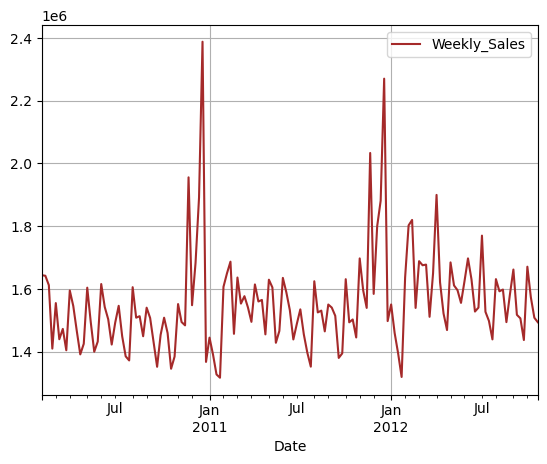

In [10]:
df1.plot(color='brown')
plt.grid()
plt.show()

### Stationarity test

In [11]:
from statsmodels.tsa.stattools import adfuller
# p-value>0.05 --> not stationary --> Null Hyp
# p-value<0.05 --> stationary --> Alt Hyp
result = adfuller(df1['Weekly_Sales'])
p_value = result[1]
print(p_value)
if p_value<0.05:
    print('Stationary')
else:
    print('Not stationary')

1.3877788330759535e-05
Stationary


In [12]:
# KPSS test( Kwiatkowski–Phillips–Schmidt–Shin test)
from statsmodels.tsa.stattools import kpss
stats,p,lags,critical = kpss(df1['Weekly_Sales'])
if p>0.05:
    print('Stationary')
else:
    print('Not stationary')
print(p)

Not stationary
0.047095888148842614


**Seasionality of this data is one year, so we take window 52
(52 weeks per year).**

In [13]:
rolling_mean = df1.rolling(window=52).mean()
rolling_mean

,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
...,...
2012-09-28,1.613969e+06
2012-10-05,1.614734e+06
2012-10-12,1.616264e+06


**Removing the trend from the timestamp if trend is present**

In [15]:
rolling_mean_detrended = df1-rolling_mean
rolling_mean_detrended

,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
...,...
2012-09-28,-176909.317308
2012-10-05,56052.084615
2012-10-12,-43190.823077


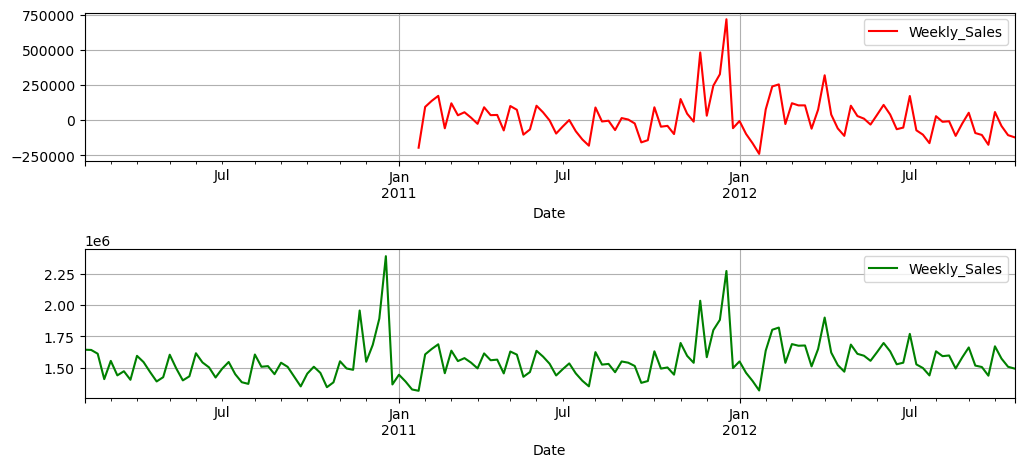

In [16]:
ax1 = plt.subplot(211)
rolling_mean_detrended.plot(figsize=(12,5),color='red',ax=ax1)
plt.grid()
ax2 = plt.subplot(212)
df1.plot(figsize=(12,5),color='green',ax=ax2)
plt.subplots_adjust(hspace=0.6)
plt.grid()
plt.show()

**Removing seasonality**

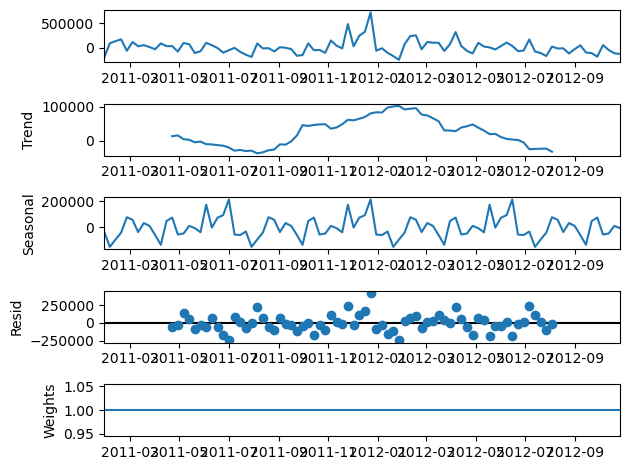

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(rolling_mean_detrended.dropna(), period=25)
decompose_result.plot(weights=True)
plt.show()

In [19]:
# removing seasionality
rolling_mean_decomposed_diff = rolling_mean_detrended - rolling_mean_detrended.shift()
rolling_mean_decomposed_diff

,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
...,...
2012-09-28,-69884.058269
2012-10-05,232961.401923
2012-10-12,-99242.907692


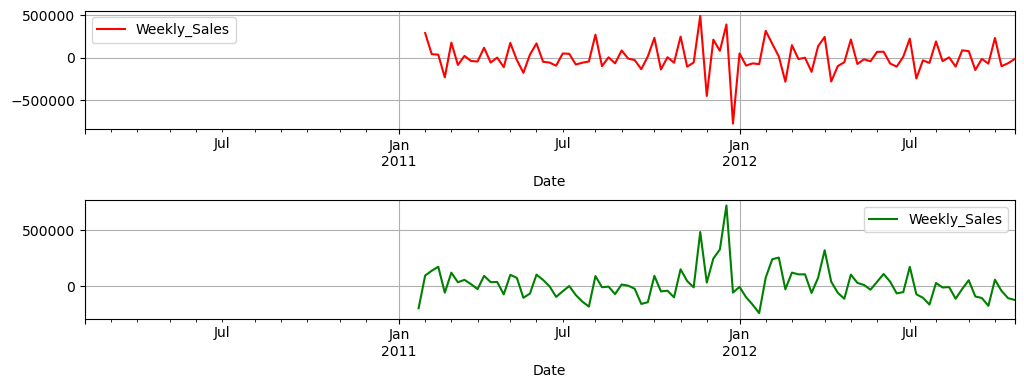

In [20]:
ax1=plt.subplot(211)
rolling_mean_decomposed_diff.plot(figsize=(12,4),color='red',ax=ax1)
plt.grid()
ax2=plt.subplot(212)
rolling_mean_detrended.plot(figsize=(12,4),color='green',ax=ax2)
plt.subplots_adjust(hspace=0.6)
plt.grid()
plt.show()
plt.show()

In [21]:
rolling_mean_decomposed_diff.dropna(inplace=True)
rolling_mean_decomposed_diff

,Weekly_Sales
Date,
2011-02-04,290442.987692
2011-02-11,42838.090577
2011-02-18,35787.953654
2011-02-25,-230947.744038
2011-03-04,177896.654423
...,...
2012-09-28,-69884.058269
2012-10-05,232961.401923
2012-10-12,-99242.907692


In [22]:
final = adfuller(rolling_mean_decomposed_diff['Weekly_Sales'])
final[1]

3.257853293563733e-07

### Visualize ACF and PACF to choose the Times seris model

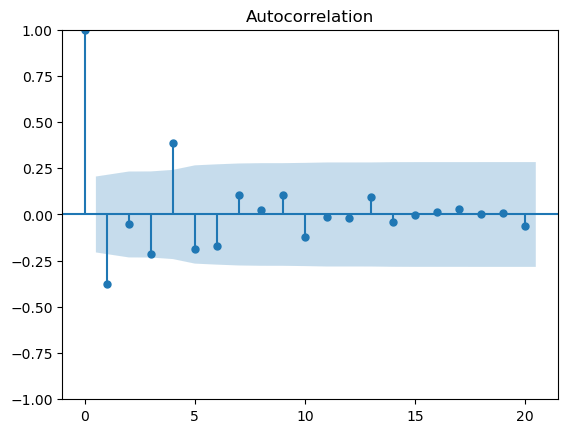

In [23]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(rolling_mean_decomposed_diff['Weekly_Sales'])
plt.show()

C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


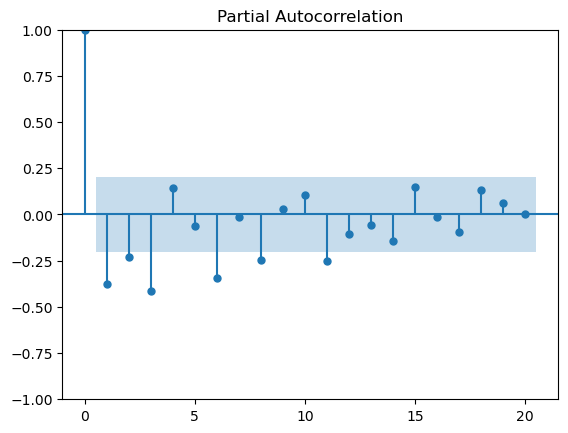

In [24]:
plot_pacf(rolling_mean_decomposed_diff['Weekly_Sales'])
plt.show()

### Choosing the best model using autoarima

In [25]:
from pmdarima import auto_arima
order = auto_arima(rolling_mean_decomposed_diff['Weekly_Sales'],trace=True)
order.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2428.230, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2454.958, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2442.923, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2426.044, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2452.960, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2426.893, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2426.900, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2428.257, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2422.325, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2421.076, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2440.908, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2424.524, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2423.465, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1207.538
Date:                Thu, 15 Feb 2024   AIC                           2421.076
Time:                        11:18:30   BIC                           2428.608
Sample:                    02-04-2011   HQIC                          2424.115
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2370      0.116      2.050      0.040       0.010       0.464
ma.L1         -0.9361      0.054    -17.315      0.000      -1.042      -0.830
sigma2      2.002e+10   7.21e-13   2.78e+22      0.000       2e+10       2e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                83.49
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                             1.39
Prob(H) (two-sided):                  0.61   Kurtosis:                         6.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.87e+38. Standard errors may be unstable.
"""

In [26]:
train = rolling_mean_decomposed_diff.iloc[:73]['Weekly_Sales']
test = rolling_mean_decomposed_diff.iloc[73:]['Weekly_Sales']

from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults

model=SARIMAX(train,order=(1,0,1),seasonal_order=(1,0,1,52),enforce_stationarity=False)
model=model.fit()

C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


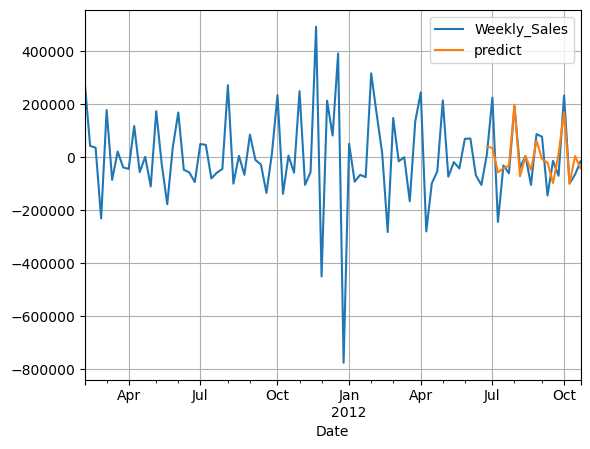

In [27]:
rolling_mean_decomposed_diff['predict'] = model.predict(start= len(train) ,
                                           end=len(train)+len(test)- 1, 
                                           dynamic=True)
rolling_mean_decomposed_diff[['Weekly_Sales','predict']].plot()
plt.grid()
plt.show()

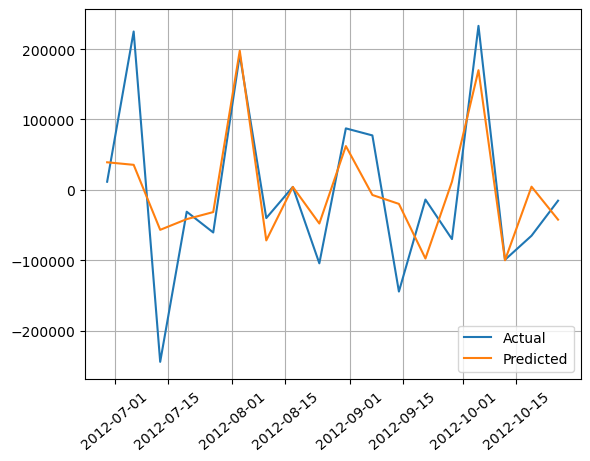

In [30]:
plt.plot(test, label='Actual')
plt.plot(rolling_mean_decomposed_diff['predict'], label='Predicted')
plt.grid()
plt.xticks(rotation=40)
plt.legend()
plt.show()

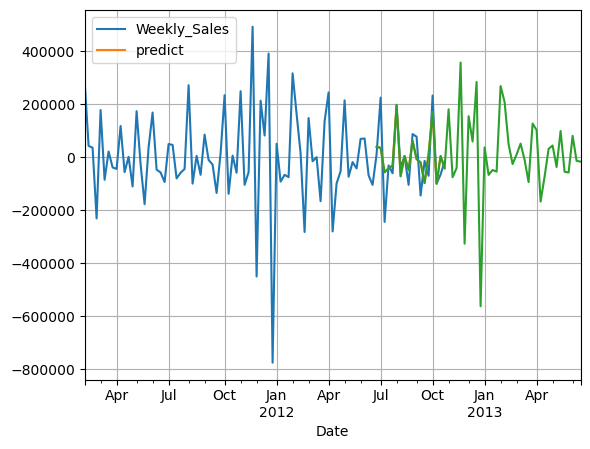

In [31]:
#predicting the projections for the next 1 year

forecast = model.forecast(steps=52)
rolling_mean_decomposed_diff.plot()
forecast.plot()
plt.grid()
plt.show()

**MODEL EVALUATION**

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train=train
y_true = test
y_pred = rolling_mean_decomposed_diff['predict'].dropna()

def mean_absolute_scaled_error(y_true, y_pred, y_train):
    e_t = y_true - y_pred
    scale = mean_absolute_error(y_train[1:], y_train[:-1])
    return np.mean(np.abs(e_t / scale))

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate evaluation metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = root_mean_squared_error(y_true, y_pred)
mas = mean_absolute_scaled_error(y_true, y_pred, y_train)
r2 = r2_score(y_true, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Scaled Error:', mas)
print('R^2 Score:', r2)


Mean Absolute Error: 60986.50124877769
Mean Squared Error: 6857586324.358059
Root Mean Squared Error: 82810.54476549504
Mean Absolute Scaled Error: 0.2940677380502227
R^2 Score: 0.5466095127292332


### Lets forecast next 12 weeks of sales for each stores

In [34]:
predictions = {}
for i in range(1,len(df.Store.unique())+1):
    store = Stores[i]
    store = store.loc[:,['Date','Weekly_Sales']]
    store.index = store['Date']
    store.drop(['Date'],axis=1,inplace=True)
    model=SARIMAX(store,order=(1,0,1),seasonal_order=(1,0,1,52),enforce_stationarity=False)
    model=model.fit()
    predict = model.predict(start= len(store) ,end=len(store)+52, dynamic=True)
    predictions[i] = predict

C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:47

C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:47

C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:47

C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\kunal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:47

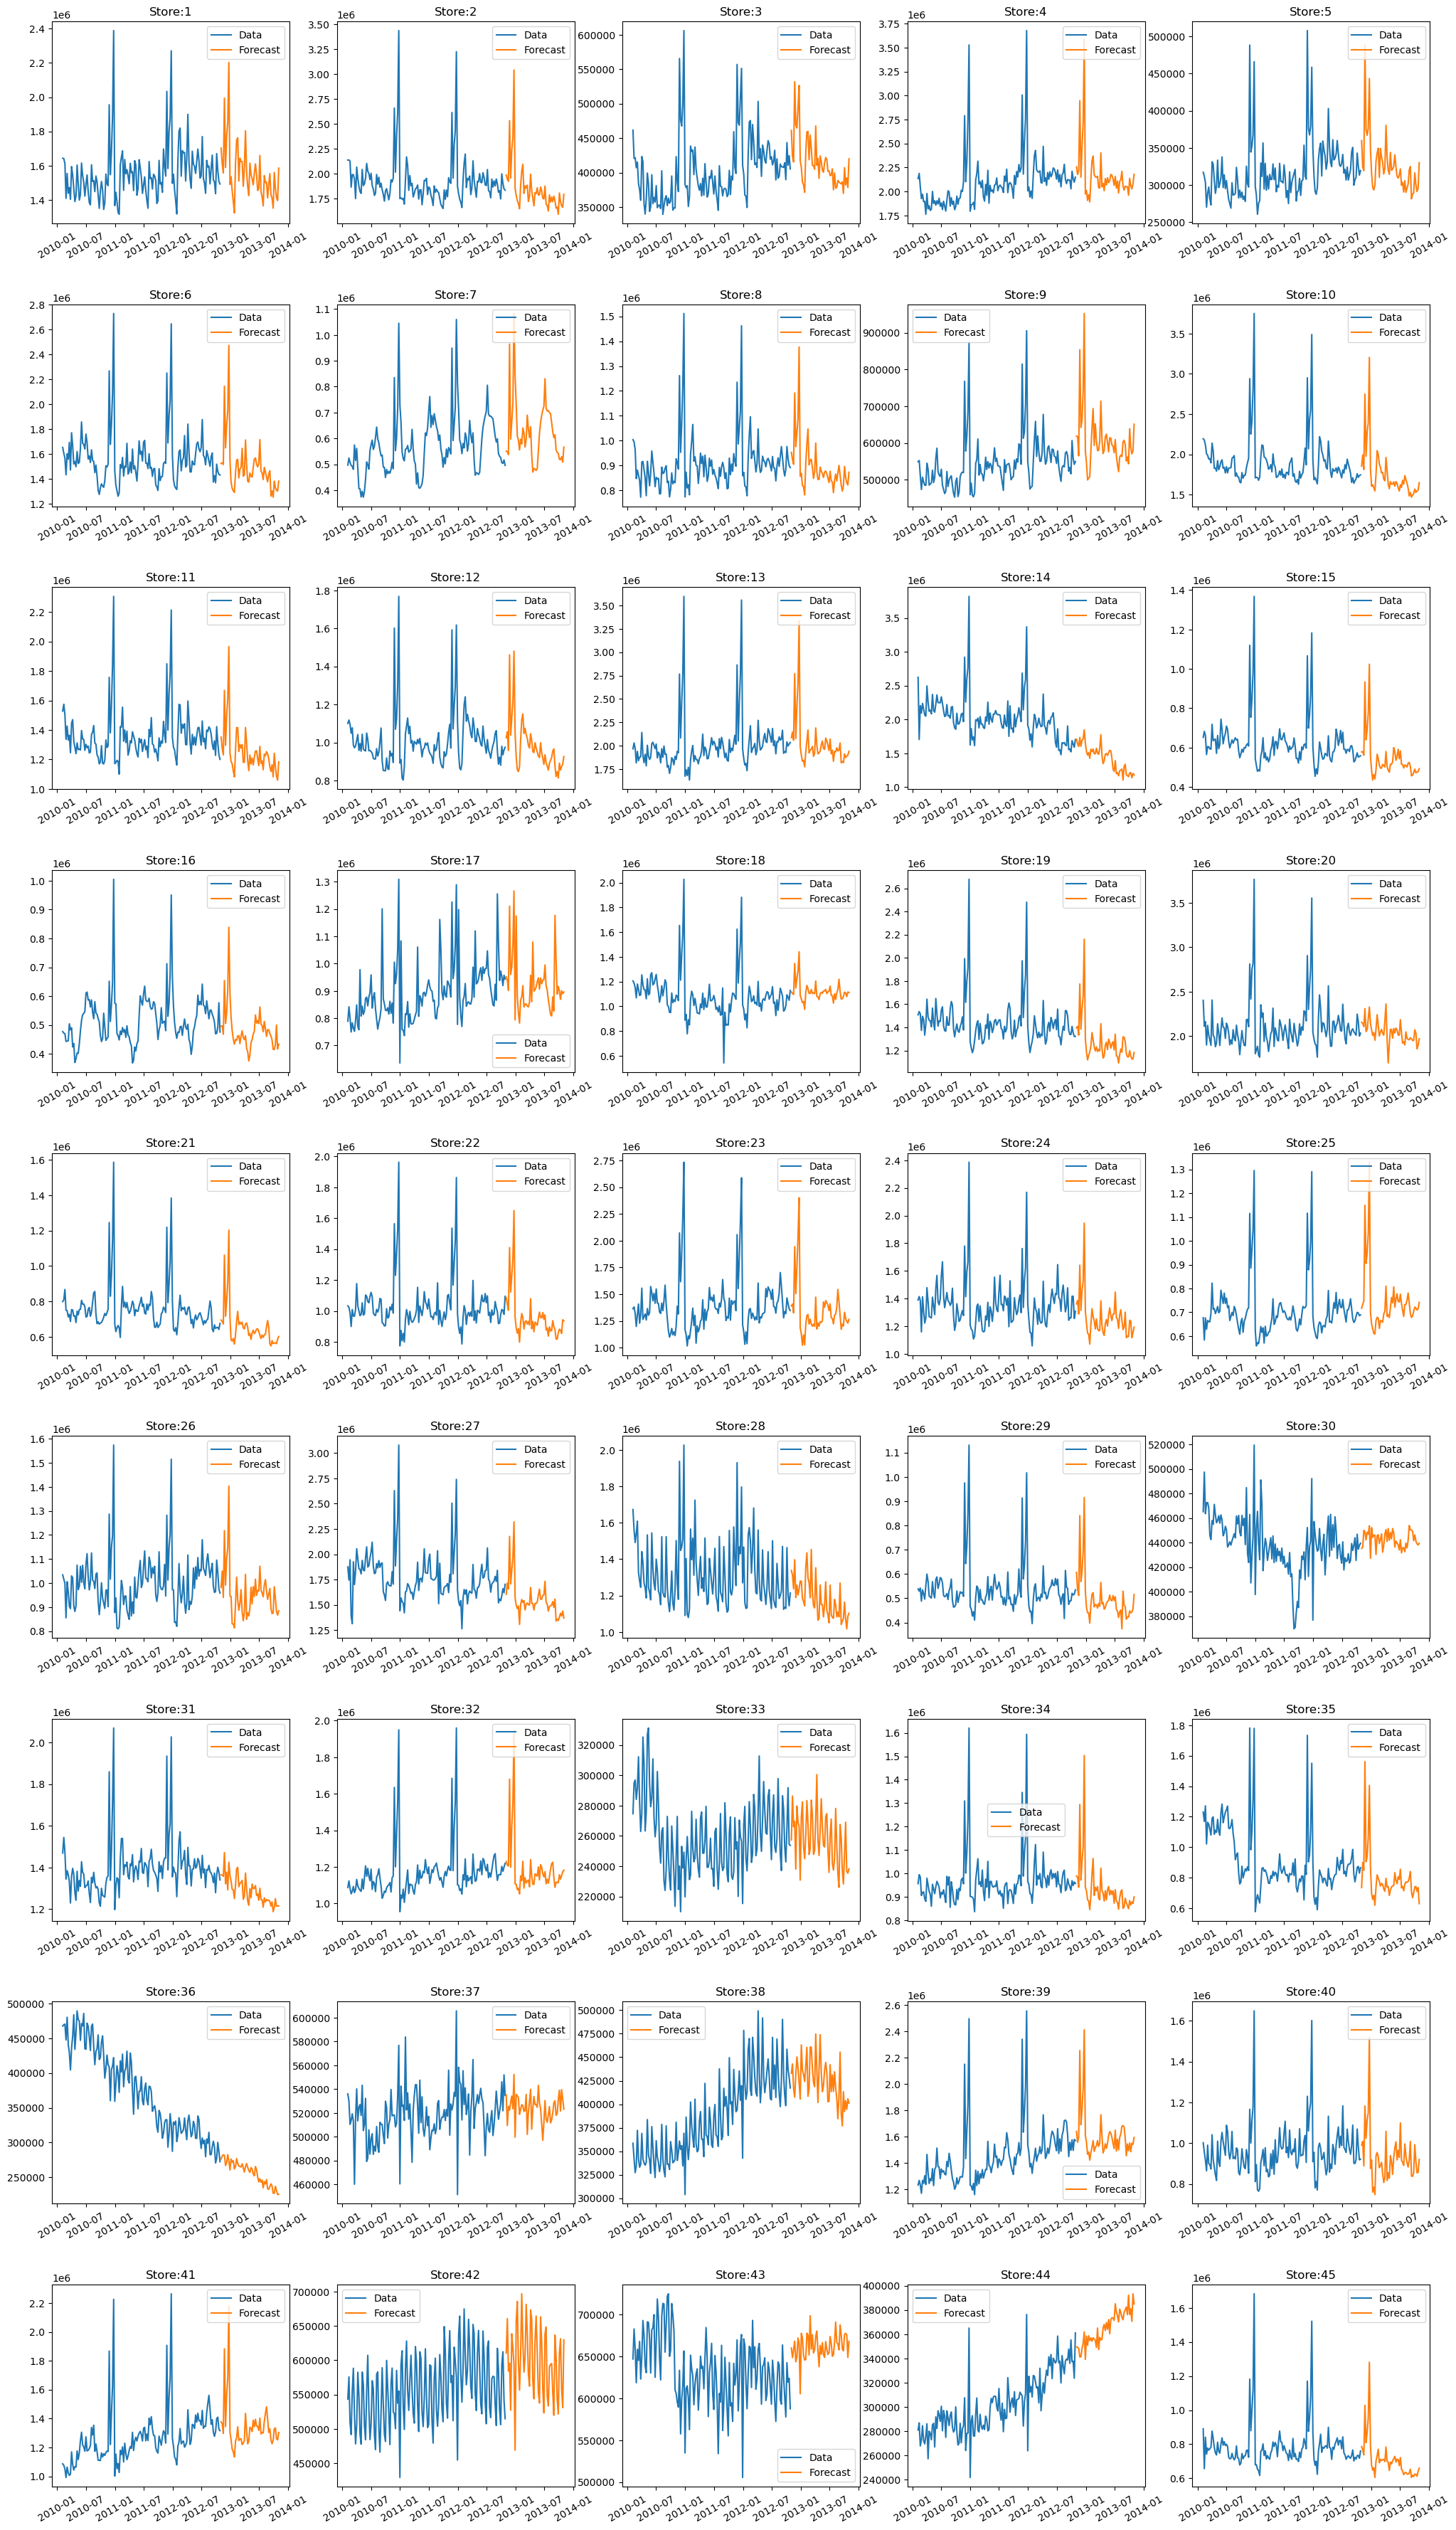

In [35]:
plt.subplots(9,5, figsize=(25,45))
for i in range (1,46):
    store=Stores[i]
    store = store.loc[:,['Date','Weekly_Sales']]
    store.index = store['Date']
    store.drop(['Date'],axis=1, inplace=True)
    predict = predictions[i]
    plt.subplot(9,5,i)
    plt.plot(store,label='Data')
    plt.plot(predict,label='Forecast')
    plt.title(f'Store:{i}')
    plt.legend()
    plt.xticks(rotation=30)
    plt.subplots_adjust(hspace=0.4)

In [ ]:
5f